# Build your own Linear Regression 

This is a personal project to help me learn about linear regression, without using automated scikit-learn function

Why this is helpful:
- Actually understand linear regression
- Learn the steps the programs actually goes through

## the two methods:
- Closed-formed solution: Using b0 and b1 (slope and intercept)

- Gradient Descent: iterative approach, used in machine learning

In [ ]:
# Import the height and weight dataset

import pandas as pd
import numpy as np

hw = pd.read_csv('SOCR-HeightWeight.csv')

# Goal is to predict height based on weight

## Closed-form solution

In [3]:
# Step 1: for each row, calculate H*W, H**2, W**2

hw["H*W"] = hw['Height(Inches)']*hw['Weight(Pounds)']
hw["H**2"] = hw['Height(Inches)']**2
hw['W**2'] = hw['Weight(Pounds)']**2
hw

,Index,Height(Inches),Weight(Pounds),H*W,H**2,W**2
0,1,65.78331,112.9925,7433.020655,4327.443875,12767.305056
1,2,71.51521,136.4873,9760.917922,5114.425261,18628.783061
2,3,69.39874,153.0269,10619.874046,4816.185114,23417.232124
3,4,68.21660,142.3354,9709.637048,4653.504516,20259.366093
4,5,67.78781,144.2971,9781.584398,4595.187185,20821.653068
...,...,...,...,...,...,...
24995,24996,69.50215,118.0312,8203.422167,4830.548855,13931.364173
24996,24997,64.54826,120.1932,7758.261924,4166.477869,14446.405326
24997,24998,64.69855,118.2655,7651.606365,4185.902372,13986.728490
24998,24999,67.52918,132.2682,8931.963086,4560.190151,17494.876731


In [16]:
# Step 2: Caculate sumHeight, sumWeight, sumH*W, sumH**2, sumW**2

sumY = sum(hw['Height(Inches)'])
sumX = sum(hw['Weight(Pounds)'])
sumXY = sum(hw['H*W'])
sumY2 = sum(hw['H**2'])
sumX2 = sum(hw['W**2'])

# calculate b0 - gradient: note: X = Weight, Y = Height
b0 = (sumY*sumX2 - sumX*sumXY)/ (25000*sumX2 - sumX**2)
b0

57.57170990310824

In [15]:
# calculate b1 - intercept:
b1 = (25000*sumXY - sumX*sumY)/(25000*sumX2-(sumX)**2)
b1

0.08200701261069472

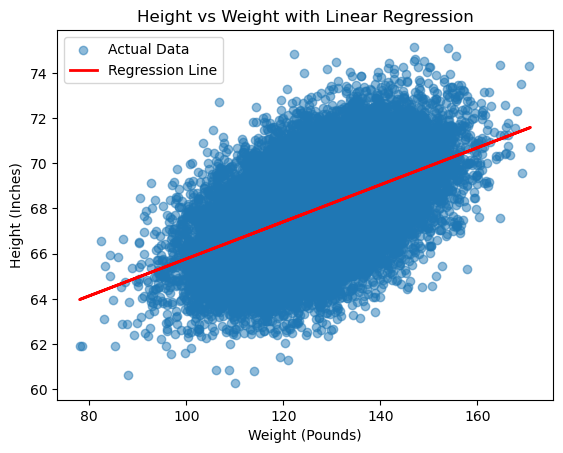

In [19]:
# Thus, the estimated linear regression is:
# Height = 0.082 * Weight + 57.5717

# Create a graph and apply the linear regression line:
import matplotlib.pyplot as plt
# Scatter plot
plt.scatter(hw['Weight(Pounds)'], hw['Height(Inches)'], alpha=0.5, label="Actual Data")

# Generate regression line values
X = hw['Weight(Pounds)']  # Sorting ensures a smooth line
Y_pred = 0.082 * X + 57.5717  # Use your calculated equation

# Plot the regression line
plt.plot(X, Y_pred, color='red', linewidth=2, label="Regression Line")

# Labels and title
plt.xlabel("Weight (Pounds)")
plt.ylabel("Height (Inches)")
plt.title("Height vs Weight with Linear Regression")
plt.legend()

# Show plot
plt.show()

In [17]:
# check - using python module
X = hw['Weight(Pounds)']
Y = hw['Height(Inches)']

# Fit a linear regression (1st-degree polynomial)
b1, b0 = np.polyfit(X, Y, 1)  # Returns slope (b1) and intercept (b0)

print(f"Intercept (b0): {b0}")
print(f"Slope (b1): {b1}")
# matches results.

Intercept (b0): 57.57170990310892
Slope (b1): 0.08200701261067588


## Gradient Descent Method

In [ ]:
# Import the height and weight dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

hw = pd.read_csv('SOCR-HeightWeight.csv')

# Goal is to predict height based on weight

# gradient descent:

# normalise the data - after trying to use the vanilla data to no success
hw["x"] = (hw["Weight(Pounds)"] - hw["Weight(Pounds)"].mean()) / hw["Weight(Pounds)"].std()
hw["y"] = (hw["Height(Inches)"] - hw["Height(Inches)"].mean()) / hw["Height(Inches)"].std()

def gradient_descent(m_now, c_now, points, L):
    m_gradient = 0
    c_gradient = 0
    
    n = len(points)
    
    for i in range(n):
        x = points.loc[i, 'x']
        y = points.loc[i, 'y']
        
        m_gradient += -(2/n) * x * (y - (m_now * x + c_now)) # partial derivative
        c_gradient += -(2/n) * (y - (m_now * x + c_now)) # partial derivative

    m = m_now - L * m_gradient
    c = c_now - L * c_gradient
    return m,c

m = 0
c = 0
L = 0.001
epochs = 300

# could mean that I need a lot more iterations

for i in range(epochs):
    if i % 50 == 0:
        print(f"Epoch: {i}")
    m, c = gradient_descent(m, c, hw, L)
    

print(f"Slope (m): {m}, Intercept (c): {c}")

# result: Slope (m): 0.22689384897719292, Intercept (c): 3.2657074866050188e-15

Epoch: 0
Epoch: 50
Epoch: 100
Epoch: 150
Epoch: 200
Epoch: 250
Slope (m): 0.22704303650732652, Intercept (c): 3.2691954612168467e-15


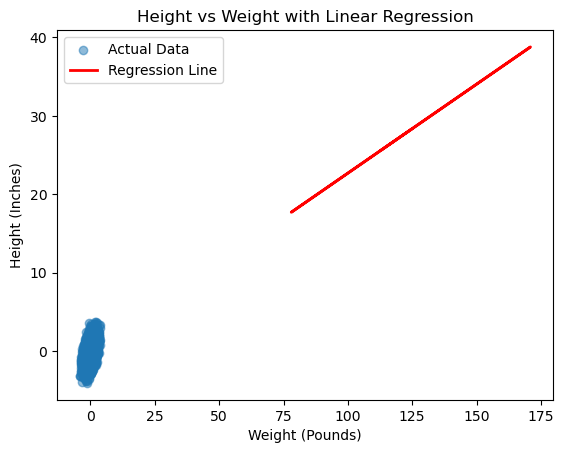

In [82]:
# much different results compared to closed form method

# plotting
plt.scatter(hw['x'], hw['y'], alpha=0.5, label="Actual Data")

# Generate regression line values
X = hw['Weight(Pounds)']  # Sorting ensures a smooth line
Y_pred = 0.22689384897719292 * X + 3.2657074866050188e-15  # Use your calculated equation

# Plot the regression line
plt.plot(X, Y_pred, color='red', linewidth=2, label="Regression Line")

# Labels and title
plt.xlabel("Weight (Pounds)")
plt.ylabel("Height (Inches)")
plt.title("Height vs Weight with Linear Regression")
plt.legend()

# Show plot
plt.show()

Gradient descent did not provide the same result as closed form equation. Possible reasons?
- Learning rate is too small, takes many iterations. Epochs = 3000 might not be enough. However, high learning rate propels the values too big, rendering gradient descent ineffective.

- positive association. Line will tilt upwards as m increases. It would seem that the line still has some more iterations to go through.


## How do I know that my code should work, just that for this particular dataset, it takes more iterations?
Let's use another dataset

### New dataset - rand with some noise

In [89]:
a = np.random.randn(40,1)
b = 2*a + np.random.rand()

# gradient and intercept
w = 0
d = 0

learning_rate = 0.01

# Modify the gradient descent function to use x, y as numpy arrays
def gradient_descent_adj(m_now, c_now, x, y, L):
    m_gradient = 0
    c_gradient = 0
    n = len(x)
    
    for i in range(n):
        m_gradient += -(2/n) * x[i] * (y[i] - (m_now * x[i] + c_now))  # Partial derivative for m
        c_gradient += -(2/n) * (y[i] - (m_now * x[i] + c_now))  # Partial derivative for c

    m = m_now - L * m_gradient  # Update the slope
    c = c_now - L * c_gradient  # Update the intercept
    return m, c

for i in range(600):
    w, d = gradient_descent_adj(w,d,a,b, learning_rate)
    bhat = (w*a + d)
    loss = np.mean((b - bhat)**2)
    print(f'{i} loss is {loss}, params: w:{w}, d: {d}')



0 loss is 2.693084694176302, params: w:[0.0286378], d: [-0.00842738]
1 loss is 2.6080599574803656, params: w:[0.05679627], d: [-0.01650953]
2 loss is 2.526158188665229, params: w:[0.08448469], d: [-0.02425631]
3 loss is 2.4472504630261485, params: w:[0.11171214], d: [-0.03167734]
4 loss is 2.371213574372827, params: w:[0.13848752], d: [-0.03878196]
5 loss is 2.2979297715614893, params: w:[0.16481951], d: [-0.0455793]
6 loss is 2.227286507392252, params: w:[0.19071664], d: [-0.05207823]
7 loss is 2.1591761992864194, params: w:[0.21618722], d: [-0.05828742]
8 loss is 2.0934960011861365, params: w:[0.24123942], d: [-0.06421527]
9 loss is 2.0301475861453726, params: w:[0.26588122], d: [-0.06987001]
10 loss is 1.9690369391063975, params: w:[0.29012041], d: [-0.07525963]
11 loss is 1.91007415937997, params: w:[0.31396466], d: [-0.08039191]
12 loss is 1.8531732723703462, params: w:[0.33742143], d: [-0.08527444]
13 loss is 1.798252050108011, params: w:[0.36049804], d: [-0.0899146]
14 loss is 1

In [ ]:
# loss value is way closer now to 0. w and d stabilised. So the gradient descent function works!